In [7]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('salary_data_cleaned.csv')

In [10]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,age,python,r,sql,spark,aws,tableau,excel
0,Data Scientist,$68K-$96K (Glassdoor Est.),Who We Are\n\nWere Americas largest mortgage l...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,...,MI,1,35,1,0,1,0,0,0,1
1,Data Scientists,$68K-$96K (Glassdoor Est.),Position Description: The Analytics Research a...,3.2,Miracle Software Systems\n3.2,Nebraska,"Novi, MI",51 to 200 employees,1994,Company - Private,...,Nebraska,0,26,1,0,0,1,0,0,0
2,Data Scientist,$68K-$96K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,VA,0,52,0,0,1,0,0,0,0
3,Data Scientist,$68K-$96K (Glassdoor Est.),New England Biolabs is seeking a Data Scientis...,4.7,New England Biolabs\n4.7,"Ipswich, MA","Ipswich, MA",201 to 500 employees,1974,Company - Private,...,MA,1,46,1,0,0,0,0,0,1
4,Data Scientist,$148K-$160K (Glassdoor Est.),The world's largest and fastest-growing compan...,4.5,Demandbase\n4.5,"San Francisco, CA","San Francisco, CA",201 to 500 employees,2006,Company - Private,...,CA,1,14,0,0,0,1,1,0,0


In [11]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'python', 'r', 'sql', 'spark', 'aws', 'tableau',
       'excel'],
      dtype='object')

In [12]:
#Functions to separate different job titles
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'


In [20]:
## Job title and seniority 

In [13]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [14]:
df['job_simp'].value_counts()

data scientist    58
data engineer     14
na                13
analyst            9
mle                6
Name: job_simp, dtype: int64

In [16]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        81
senior    19
Name: seniority, dtype: int64

In [21]:
##  Job description length 

In [25]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0     4376
1     2053
2     3490
3     2161
4     5139
      ... 
95    5182
96    1408
97    4517
98    4062
99    2397
Name: desc_len, Length: 100, dtype: int64

In [26]:
##  Competitor count

In [29]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '=1' else 0)

In [32]:
df['num_comp']

0     3
1     2
2     1
3     3
4     3
     ..
95    1
96    1
97    3
98    3
99    1
Name: num_comp, Length: 100, dtype: int64

In [33]:
#remove new line from job title

In [35]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df.company_txt

0                       Quicken Loans
1            Miracle Software Systems
2                             ManTech
3                 New England Biolabs
4                          Demandbase
                   ...               
95                  Reynolds American
96    Temple University Health System
97                     GenapSys, Inc.
98                    Mentor Graphics
99                         7Park Data
Name: company_txt, Length: 100, dtype: object

In [37]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,same_state,age,python,r,sql,spark,aws,tableau,excel,desc_len,num_comp
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.0,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000
mean,3.848000,1865.940000,89.440000,123.600000,106.52000,0.560000,32.740000,0.730000,0.0,0.57000,0.250000,0.220000,0.15000,0.490000,3813.730000,1.61000
std,0.728424,475.228639,27.859793,37.171728,31.38406,0.498888,34.524364,0.446196,0.0,0.49757,0.435194,0.416333,0.35887,0.502418,1729.015898,0.87496
min,-1.000000,-1.000000,37.000000,44.000000,40.50000,0.000000,-1.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,693.000000,1.00000
25%,3.600000,1964.000000,71.000000,96.000000,87.00000,0.000000,9.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,2447.250000,1.00000
50%,3.900000,1997.000000,87.000000,121.000000,100.50000,1.000000,20.000000,1.000000,0.0,1.00000,0.000000,0.000000,0.00000,0.000000,3676.500000,1.00000
75%,4.300000,2009.250000,99.000000,154.000000,129.00000,1.000000,43.000000,1.000000,0.0,1.00000,0.250000,0.000000,0.00000,1.000000,4831.250000,3.00000
max,5.000000,2018.000000,170.000000,196.000000,183.00000,1.000000,168.000000,1.000000,0.0,1.00000,1.000000,1.000000,1.00000,1.000000,9744.000000,3.00000


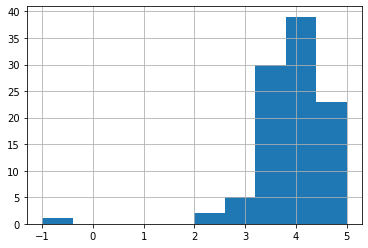

In [39]:
df.Rating.hist()

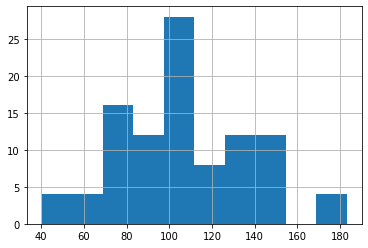

In [40]:
df.avg_salary.hist()

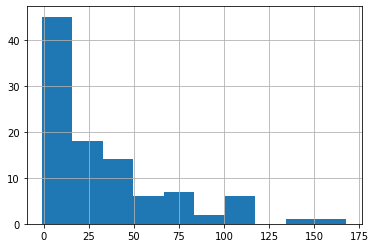

In [41]:
df.age.hist()

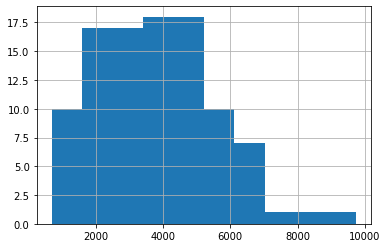

In [42]:
df.desc_len.hist()

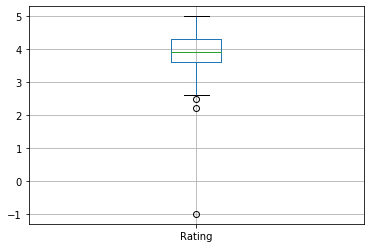

In [45]:
df.boxplot(column = 'Rating')

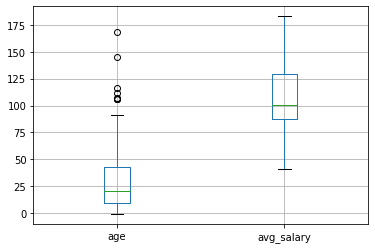

In [46]:
df.boxplot(column = ['age','avg_salary'])

In [49]:
df[['age','avg_salary','Rating','desc_len','num_comp']].corr()

,age,avg_salary,Rating,desc_len,num_comp
age,1.000000,0.040269,-0.064567,0.256826,0.233356
avg_salary,0.040269,1.000000,0.009722,0.084678,-0.103446
Rating,-0.064567,0.009722,1.000000,-0.136509,0.015405
desc_len,0.256826,0.084678,-0.136509,1.000000,-0.017731
num_comp,0.233356,-0.103446,0.015405,-0.017731,1.000000


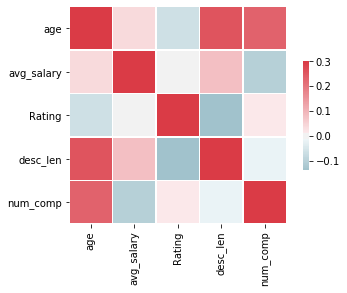

In [50]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [51]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'python', 'r', 'sql', 'spark', 'aws', 'tableau',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [52]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python', 'r','sql',
       'spark', 'aws','tableau', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 66


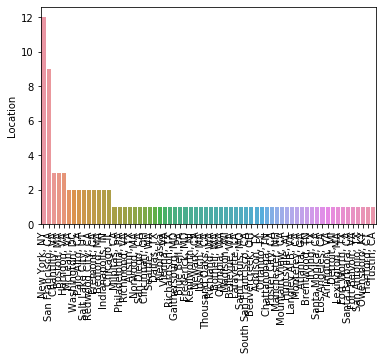

graph for Headquarters: total = 65


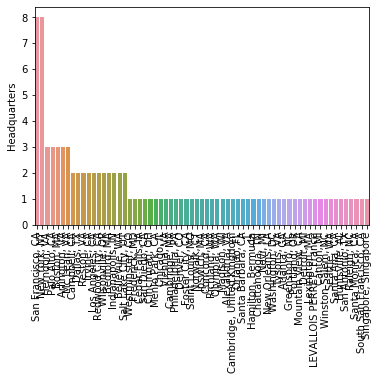

graph for Size: total = 8


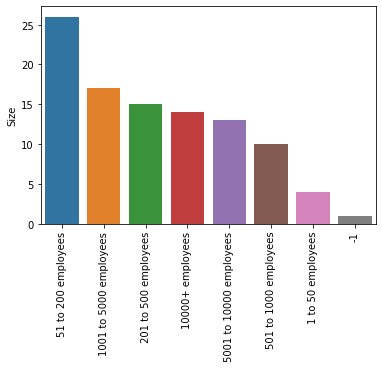

graph for Type of ownership: total = 10


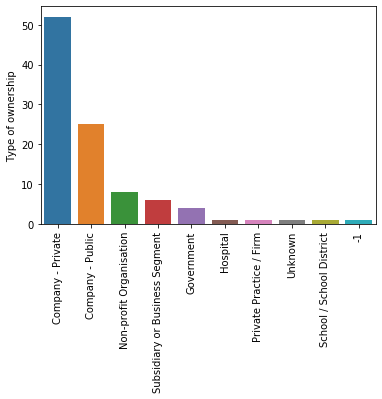

graph for Industry: total = 31


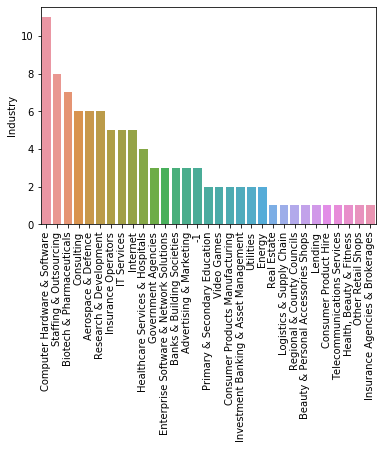

graph for Sector: total = 18


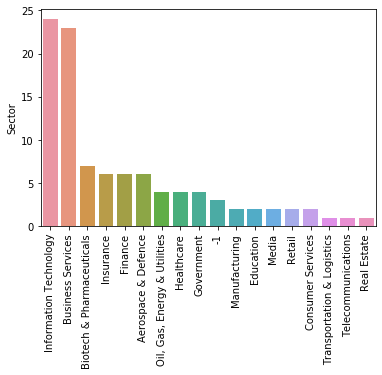

graph for Revenue: total = 11


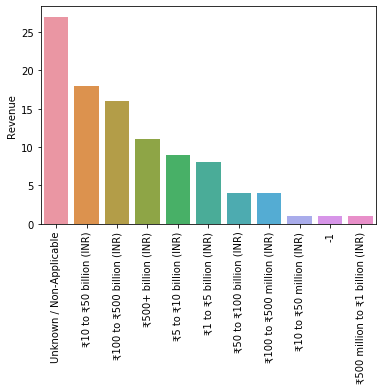

graph for company_txt: total = 93


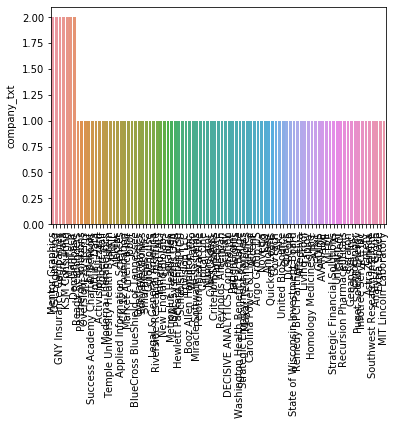

graph for job_state: total = 26


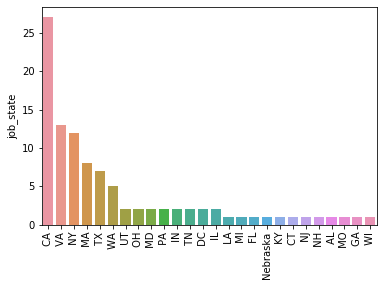

graph for same_state: total = 2


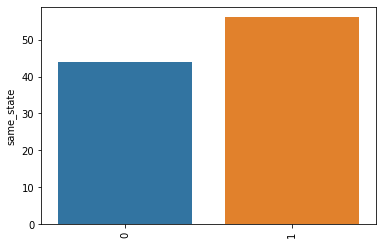

graph for python: total = 2


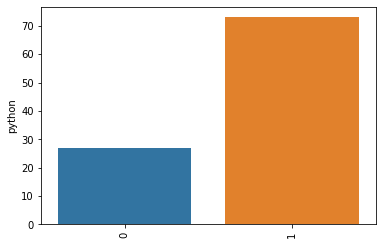

graph for r: total = 1


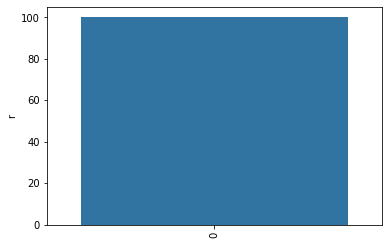

graph for sql: total = 2


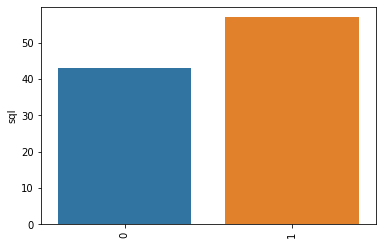

graph for spark: total = 2


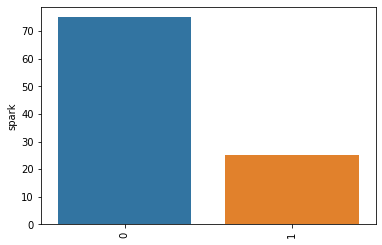

graph for aws: total = 2


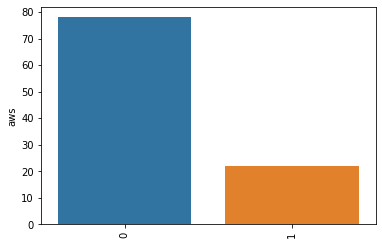

graph for tableau: total = 2


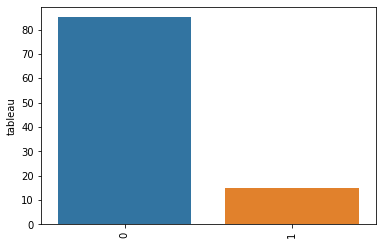

graph for excel: total = 2


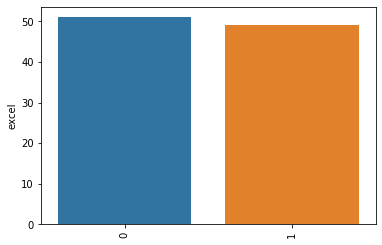

graph for job_simp: total = 5


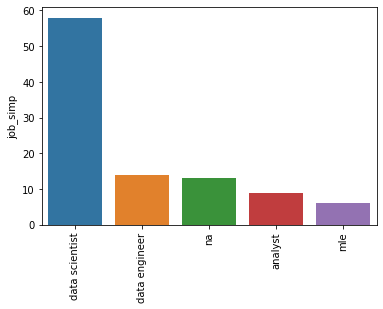

graph for seniority: total = 2


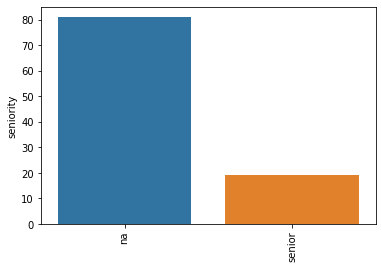

In [59]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


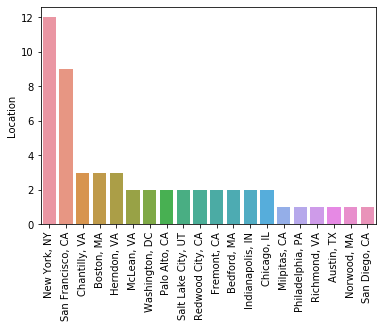

graph for Headquarters: total = 20


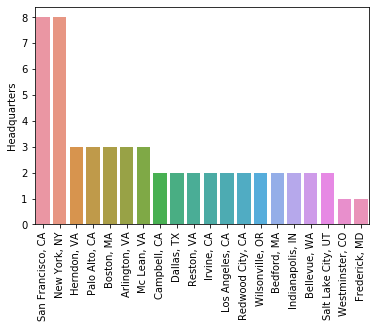

graph for company_txt: total = 20


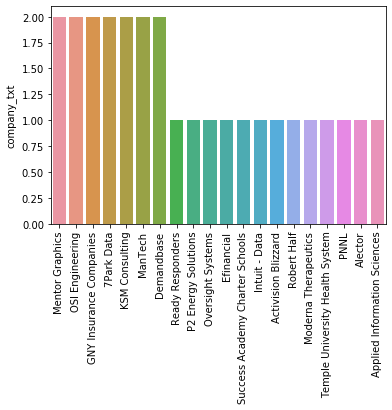

In [63]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [65]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'python', 'r', 'sql', 'spark', 'aws', 'tableau',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [66]:
pd.pivot_table(df, index = 'job_simp' , values = 'avg_salary')

,avg_salary
job_simp,
analyst,90.944444
data engineer,98.321429
data scientist,109.887931
mle,122.000000
na,103.961538


In [67]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na          87.785714
               senior     102.000000
data engineer  na          95.500000
               senior     135.000000
data scientist na         110.130435
               senior     108.958333
mle            na         129.000000
               senior      87.000000
na             na         101.250000
               senior     113.000000

In [70]:
pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
NJ,183.000000
DC,139.500000
NH,135.000000
IL,122.250000
IN,122.250000
FL,118.500000
KY,118.500000
NY,117.000000
MA,116.750000


In [71]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
Nebraska  data scientist   82.000000
 WI       data scientist  107.500000
 WA       data scientist  125.166667
          data engineer    75.000000
          analyst          77.000000
 VA       na              100.500000
          data scientist   98.555556
          data engineer   106.000000
          analyst          75.000000
 UT       data scientist   91.000000
          data engineer    77.000000
 TX       na              114.000000
          data scientist  108.000000
          data engineer    84.000000
 TN       data scientist  100.500000
          data engineer    75.000000
 PA       analyst          84.750000
 OH       na               99.000000
          data scientist   87.000000
 NY       data engineer   122.750000
          na               90.333333
          data scientist  131.666667
          analyst          97.500000
 NJ       data scientist  183.000000
 NH       data scientist  135.000000
 MO       analyst          60.500000
 MI       data scientist   82.000000
 MD       data scientist   82.000000
 MA       na              104.166667
          mle              87.000000
          data scientist  133.625000
 LA       data engineer   100.500000
 KY       na              118.500000
 IN       data scientist  122.250000
 IL       data scientist  122.250000
 GA       data scientist  107.500000
 FL       na              118.500000
 DC       data scientist  144.000000
          data engineer   135.000000
 CT       data engineer    75.000000
 CA       data scientist   99.343750
          data engineer   106.750000
          analyst         113.000000
          mle             129.000000
          na              103.500000
 AL       data scientist  100.500000

In [74]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
Nebraska  data scientist           1
 WI       data scientist           1
 WA       data scientist           3
          data engineer            1
          analyst                  1
 VA       na                       1
          data scientist           9
          data engineer            2
          analyst                  1
 UT       data scientist           1
          data engineer            1
 TX       na                       2
          data scientist           3
          data engineer            2
 TN       data scientist           1
          data engineer            1
 PA       analyst                  2
 OH       na                       1
          data scientist           1
 NY       data engineer            2
          na                       3
          data scientist           6
          analyst                  1
 NJ       data scientist           1
 NH       data scientist           1
 MO       analyst                  1
 MI       data scientist           1
 MD       data scientist           2
 MA       na                       3
          mle                      1
          data scientist           4
 LA       data engineer            1
 KY       na                       1
 IN       data scientist           2
 IL       data scientist           2
 GA       data scientist           1
 FL       na                       1
 DC       data scientist           1
          data engineer            1
 CT       data engineer            1
 CA       data scientist          16
          data engineer            2
          analyst                  3
          mle                      5
          na                       1
 AL       data scientist           1

In [75]:
#Highest salary for data scientist
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
NJ,183.000000
DC,144.000000
NH,135.000000
MA,133.625000
NY,131.666667
WA,125.166667
IL,122.250000
IN,122.250000
TX,108.000000


In [76]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'python', 'r', 'sql', 'spark', 'aws', 'tableau',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [78]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp',  'python', 'r', 'sql','spark', 'aws', 'tableau','excel', 'Type of ownership','avg_salary']]

In [79]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 4.6    163.666667
 2.2    129.000000
 3.5    124.500000
 3.2    123.500000
 3.4    120.750000
 2.5    118.500000
 3.7    118.071429
 4.0    115.916667
 5.0    114.333333
 3.6    110.250000
 3.1    108.000000
 2.9    107.500000
 4.5    107.333333
 4.4    106.333333
 3.9    105.333333
 2.7    103.500000
 4.2     99.000000
 4.7     96.300000
-1.0     91.000000
 4.1     86.944444
 3.8     86.444444
 4.3     84.000000
 2.6     77.000000
 3.3     40.500000
Industry
                                         avg_salary
Industry                                           
Health, Beauty & Fitness                 183.000000
Consulting                               129.166667
Consumer Products Manufacturing          126.750000
Government Agencies                      126.166667
Telecommunications Services              125.000000
Other Retail Shops                       125.000000
Advertising & Marketing                  123.500000
Utilities             

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [80]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
-1,1.0,NaN
Unknown / Non-Applicable,5.0,22.0
₹1 to ₹5 billion (INR),2.0,6.0
₹10 to ₹50 billion (INR),3.0,15.0
₹10 to ₹50 million (INR),NaN,1.0
₹100 to ₹500 billion (INR),8.0,8.0
₹100 to ₹500 million (INR),1.0,3.0
₹5 to ₹10 billion (INR),4.0,5.0
₹50 to ₹100 billion (INR),NaN,4.0


In [99]:
import sys
print(sys.executable)

C:\Users\admin\Anaconda3\python.exe


In [103]:
import wordcloud

In [104]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

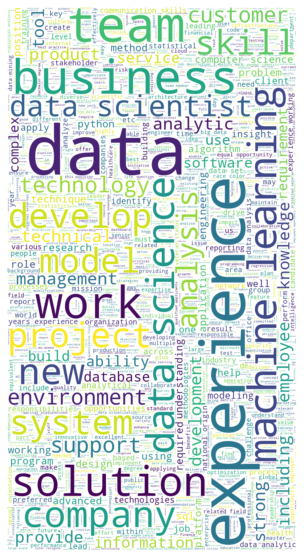

In [106]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()